<a href="https://colab.research.google.com/github/TapasKumarDutta1/anomaly-detection/blob/main/Working_Demo_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/TapasKumarDutta1/anomaly-detection.git

Cloning into 'anomaly-detection'...
remote: Enumerating objects: 886, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 886 (delta 47), reused 87 (delta 25), pack-reused 747
Receiving objects: 100% (886/886), 1.20 MiB | 13.55 MiB/s, done.
Resolving deltas: 100% (412/412), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/connected-robotics-submission/ezyZip.zip", 'r') as zObject:
    zObject.extractall(
        path="/content")

In [4]:
cd /content/anomaly-detection

/content/anomaly-detection


## Task 1

In [5]:
#Task1
import glob
from tqdm import tqdm
from segmentation import matchTemplates
import cv2
import numpy as np
import os
import sys

os.mkdir("/content/segmented")

template_image = cv2.imread("/content/color/OK1/No.000_OK.bmp")

template = template_image[180:1100,:700,:]

for path in tqdm(glob.glob("/content/color/*/*.bmp")):
  
  image = cv2.imread(path)
  #slide the template over the images and compare similarity using cv2.TM_CCOEFF_NORMED
  #cv2.TM_CCOEFF_NORMED works similar to cosine similarity as in (A . B) / (|A| + |B|)
  Hits = matchTemplates(template, image, N_object=8,score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0.3)
  
  for en,(_,i) in enumerate(Hits.iterrows()):
    
    y,x,h,w = i['BBox']
    part = image[x : x + w, y : y + h, :]
    name = path.split("/")
    typ, num = name[-2],name[-1]
    part = image[x : x + w, y : y + h, :]
    cv2.imwrite("/content/segmented/" + typ + "_" + ".".join( num.split(".")[:-1]) + "_" + str(en) + ".png", part)

100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


## Task 2

In [6]:
from distutils.dir_util import copy_tree
copy_tree("/content/drive/MyDrive/connected-robotics-submission/annotate_after_segment", "/content/annotated")

['/content/annotated/template.png',
 '/content/annotated/.DS_Store',
 '/content/annotated/ok1/OK1_No.002_OK_5.png',
 '/content/annotated/ok1/OK1_No.002_OK_6.png',
 '/content/annotated/ok1/OK1_No.003_OK_0.png',
 '/content/annotated/ok1/OK1_No.003_OK_1.png',
 '/content/annotated/ok1/OK1_No.000_OK_6.png',
 '/content/annotated/ok1/OK1_No.000_OK_7.png',
 '/content/annotated/ok1/OK1_No.001_OK_2.png',
 '/content/annotated/ok1/OK1_No.002_OK_3.png',
 '/content/annotated/ok1/OK1_No.002_OK_1.png',
 '/content/annotated/ok1/OK1_No.000_OK_0.png',
 '/content/annotated/ok1/OK1_No.003_OK_4.png',
 '/content/annotated/ok1/OK1_No.000_OK_1.png',
 '/content/annotated/ok1/OK1_No.000_OK_5.png',
 '/content/annotated/ok1/OK1_No.001_OK_4.png',
 '/content/annotated/ok1/OK1_No.002_OK_7.png',
 '/content/annotated/ok1/OK1_No.001_OK_3.png',
 '/content/annotated/ok1/OK2_No.004_OK_0.png',
 '/content/annotated/ok1/OK1_No.003_OK_6.png',
 '/content/annotated/ok1/OK1_No.000_OK_4.png',
 '/content/annotated/ok1/OK1_No.000_OK

In [7]:
cd /content/anomaly-detection/HistAuGAN

/content/anomaly-detection/HistAuGAN


In [8]:
!python train.py --dataroot /content/annotated/ok1 --name GAN-ok --result_dir /content --num_domains 5 --batch_size 4 --n_ep 5 --img_save_freq 1 --model_save_freq 1 --resize_size 768 --resume /content/drive/MyDrive/connected-robotics-submission/HistAugGAN-starting-weights.pth --nThreads 2
#actual training needed was 1200 epochs

2023-04-20 06:36:01.604551: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 06:36:02.630487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
hi

--- load options ---
batch_size: 4
concat: 1
crop_size: 216
d_iter: 3
dataroot: /content/annotated/ok1
dis_norm: None
dis_scale: 3
dis_spectral_norm: False
display_dir: ./logs
display_freq: 10
gpu: 0
img_save_freq: 1
input_dim: 3
lambda_cls: 1.0
lambda_cls_G: 5.0
lambda_rec: 10
lr_policy: step
model_save_freq: 1
nThreads: 2
n_ep: 5
n_ep_decay: 600
name: GAN-ok
no_display_img: False
no_flip: False
num_domains: 5
phase: train
resize_size: 768
result_dir: /content
resume: /content/drive/MyDrive/connected-robotics-submission/HistAugGAN-starting-weights.pth
t

In [9]:
from matplotlib import pyplot as plt
import cv2
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from PIL import Image

from model import MD_multi
from augmentations import opts
from augmentations import generate_hist_augs
import cv2
import torch
import glob
import numpy as np
from tqdm import tqdm
import os
model = MD_multi(opts).to("cuda")
model.resume("/content/drive/MyDrive/connected-robotics-submission/GAN_stage_1_wts.pth", train=False)
model.eval()
os.mkdir("/content/GANs-stage1")
for path in tqdm(glob.glob("/content/annotated/ok1/*")):
    img = torch.from_numpy(np.transpose(cv2.imread(path),(2,0,1))/255).float().to('cuda')


    z_content = model.enc_c(img.sub(0.5).mul(2).unsqueeze(0))
    out = generate_hist_augs(img, 0, model, None, same_attribute=False, new_domain=0, stats=None, device='cuda')

    img1=out.add(1).div(2).permute(1, 2, 0).cpu().numpy()
    name=path.split("/")[-1]
    name=name.split(".")[0]+name.split(".")[1]+"_stage1."+name.split(".")[2]
    cv2.imwrite("/content/GANs-stage1/"+name,255*img1)


100%|██████████| 143/143 [01:22<00:00,  1.74it/s]


In [10]:
import os
import shutil
os.mkdir("/content/train-stage-1")
for src in glob.glob("/content/GANs/*"):
    shutil.copyfile(src, "/content/train-stage-1/"+src.split("/")[-1])
for src in glob.glob("/content/annotated/ok1/*"):
    shutil.copyfile(src, "/content/train-stage-1/"+src.split("/")[-1])

In [11]:
cd ..

/content/anomaly-detection


In [12]:
pip install pytorch_lightning==1.9.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 20.8 MB/s eta 0:00:00


In [13]:
!python anomaly_detection.py --phase train --dataset_path /content/train-stage-1 --project_path  /content/anomaly-stage-1-GAN --batch_size 1 --num_epochs 1

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=[0])` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=[0])` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_

## Task 3

Defect Types and quantitative evaluation
### 1. Blurry Text:
        Definition: Texts are blurry
        Condition: Anomaly map covers text region
### 2. Structural Defect:
        Definition: Structures are malformed
        Condition: Anomaly map covers structure edges
### 3. Color/Scratch Defect:
        Definition: Color of region different from surrounding
        Condition: Anomaly map present within structure 

### Quantitative Evaluation: 
  
Area covered by observable largest defect 

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average

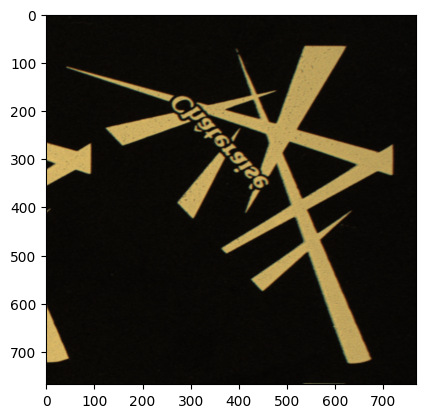

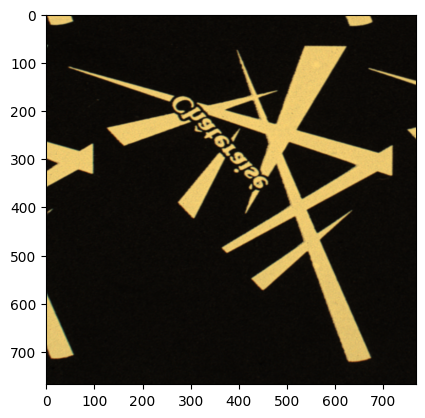

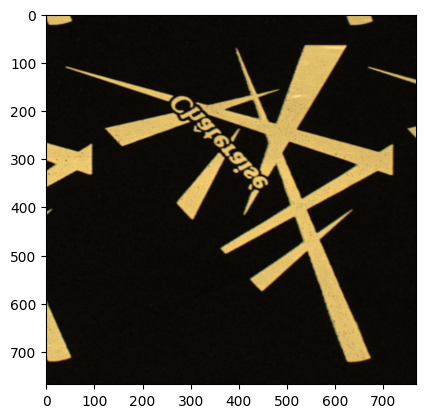

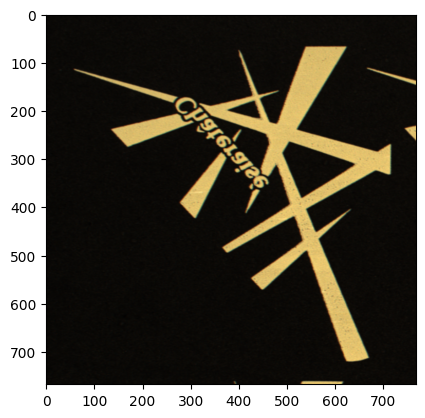

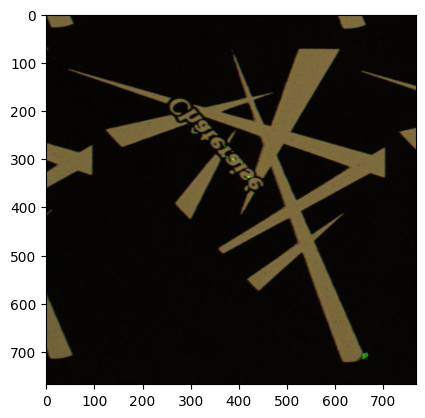

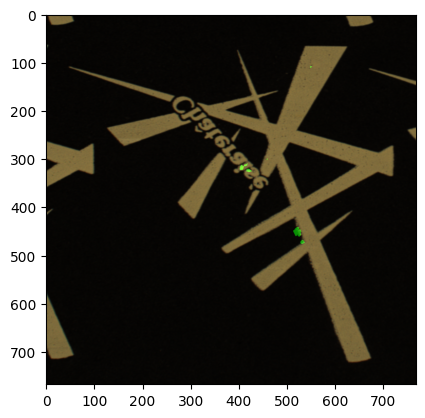

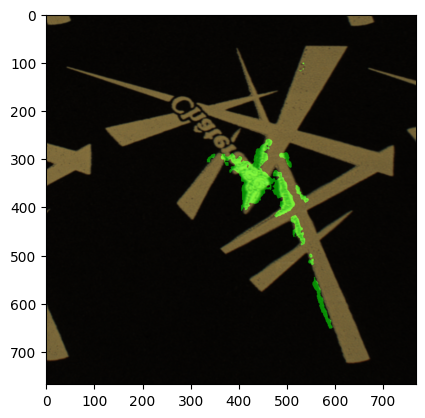

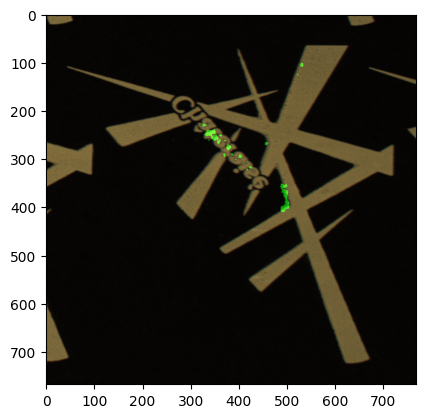

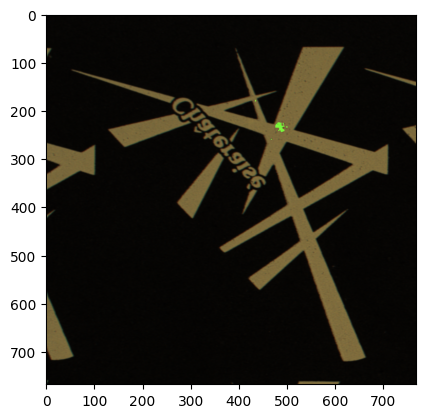

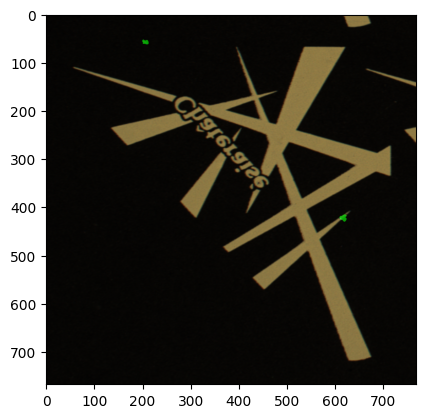

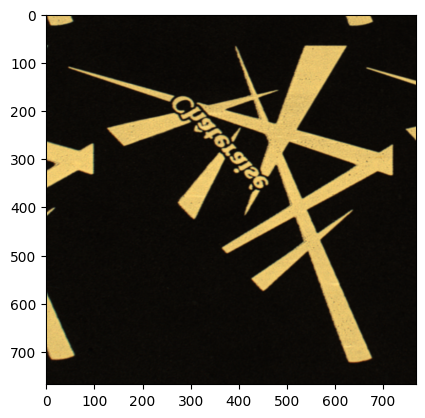

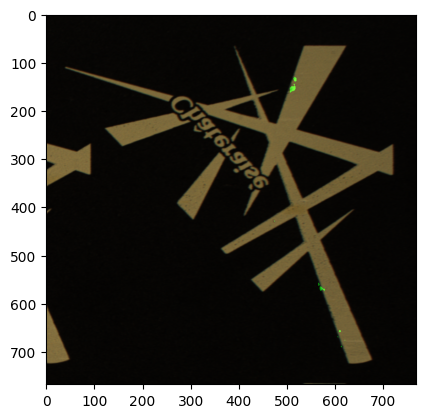

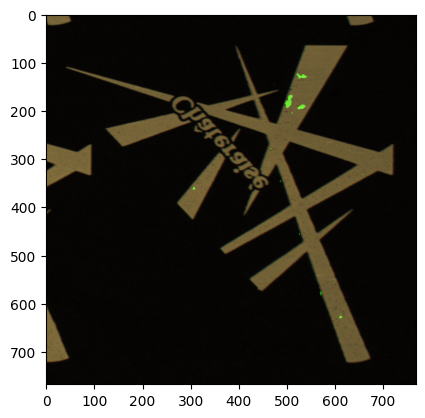

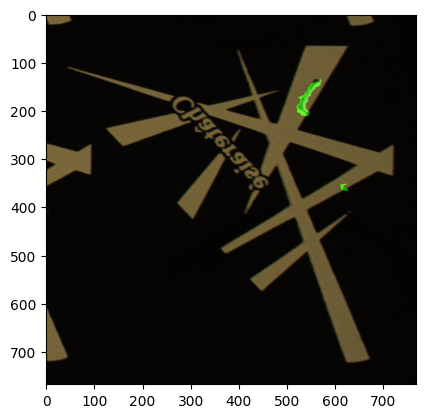

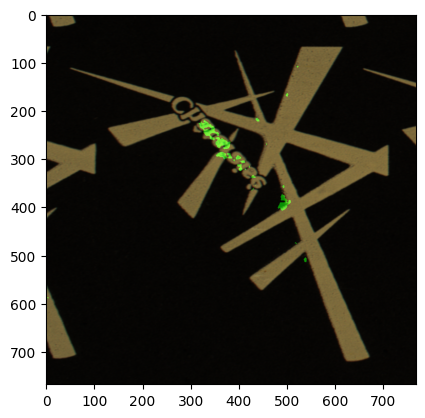

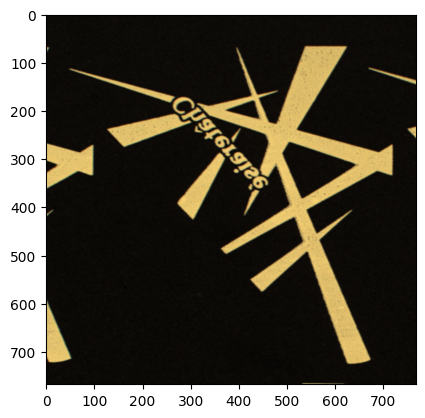

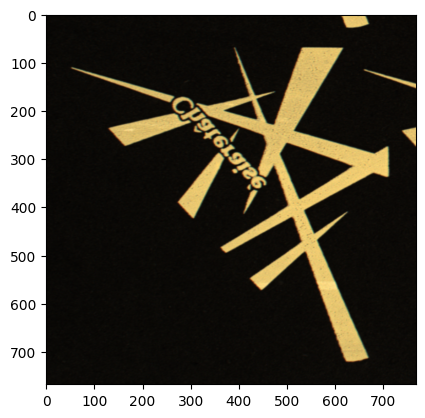

In [14]:
from get_anomaly_map import *
get_anomaly_map("/content/annotated/nok1","/content/drive/MyDrive/connected-robotics-submission/student-teacher-stage-1-with-GAN.ckpt","stage-1-GAN")

## Task 4: Anomaly Detection Given a Single Good Template


In [15]:
cd /content/anomaly-detection/HistAuGAN

/content/anomaly-detection/HistAuGAN


In [16]:
!python train.py --template /content/annotated/template.png --dataroot /content/annotated/ok1 --name GAN-template --result_dir /content --num_domains 5 --batch_size 4 --n_ep 5 --img_save_freq 1 --model_save_freq 1 --resize_size 768 --resume /content/drive/MyDrive/connected-robotics-submission/HistAugGAN-starting-weights.pth --nThreads 2

2023-04-20 06:40:09.517584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 06:40:10.801727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
hi

--- load options ---
batch_size: 4
concat: 1
crop_size: 216
d_iter: 3
dataroot: /content/annotated/ok1
dis_norm: None
dis_scale: 3
dis_spectral_norm: False
display_dir: ./logs
display_freq: 10
gpu: 0
img_save_freq: 1
input_dim: 3
lambda_cls: 1.0
lambda_cls_G: 5.0
lambda_rec: 10
lr_policy: step
model_save_freq: 1
nThreads: 2
n_ep: 5
n_ep_decay: 600
name: GAN-template
no_display_img: False
no_flip: False
num_domains: 5
phase: train
resize_size: 768
result_dir: /content
resume: /content/drive/MyDrive/connected-robotics-submission/HistAugGAN-starting-weights

In [17]:
model = MD_multi(opts).to("cuda")
model.resume("/content/drive/MyDrive/connected-robotics-submission/GAN_stage_2_wts.pth", train=False)
model.eval()
os.mkdir("/content/GANs-stage2")
for path in tqdm(glob.glob("/content/annotated/ok1/*")):
    img = torch.from_numpy(np.transpose(cv2.imread(path),(2,0,1))/255).float().to('cuda')


    z_content = model.enc_c(img.sub(0.5).mul(2).unsqueeze(0))
    out = generate_hist_augs(img, 0, model, None, same_attribute=False, new_domain=1, stats=None, device='cuda')

    img1=out.add(1).div(2).permute(1, 2, 0).cpu().numpy()
    name=path.split("/")[-1]
    name=name.split(".")[0]+name.split(".")[1]+"_stage2."+name.split(".")[2]
    cv2.imwrite("/content/GANs-stage2/"+name,255*img1)

100%|██████████| 143/143 [01:20<00:00,  1.78it/s]


In [18]:
os.mkdir("/content/train-stage-2")
for src in glob.glob("/content/GANs/*"):
    shutil.copyfile(src, "/content/train-stage-2/"+src.split("/")[-1])
for src in glob.glob("/content/annotated/ok1/*"):
    shutil.copyfile(src, "/content/train-stage-2/"+src.split("/")[-1])
for src in glob.glob("/content/GANs-stage2/*"):
    shutil.copyfile(src, "/content/train-stage-2/"+src.split("/")[-1])

In [19]:
cd ..

/content/anomaly-detection


In [20]:
!python anomaly_detection.py --wts template --phase train --dataset_path /content/train-stage-2 --project_path  /content/store2 --batch_size 1 --num_epochs 1

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=[0])` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=[0])` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_

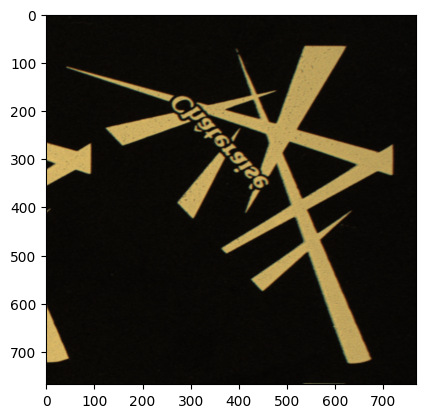

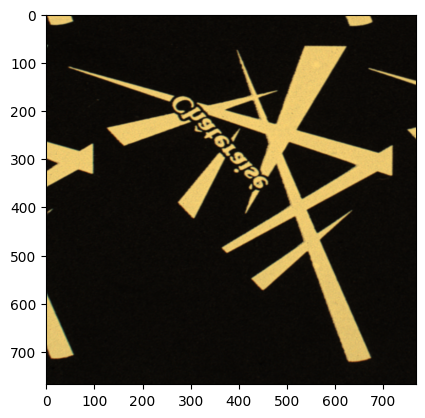

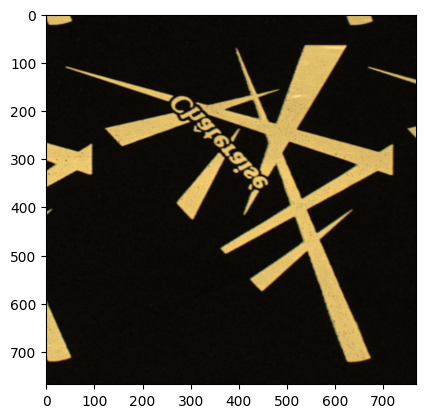

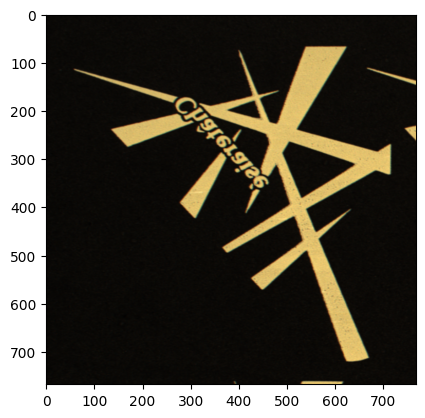

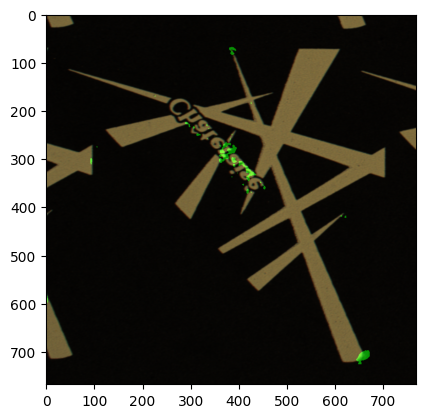

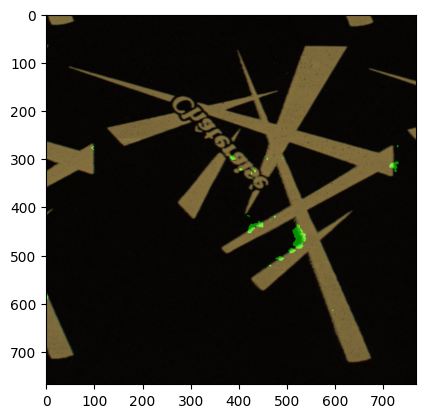

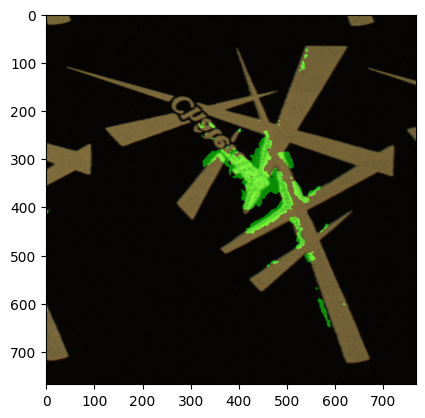

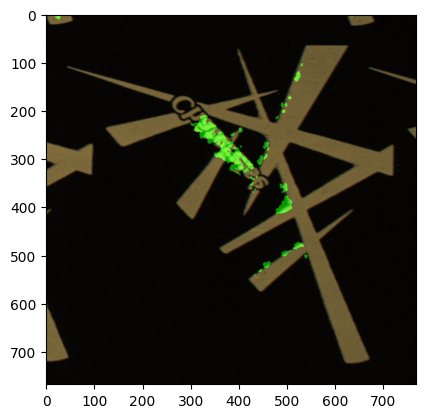

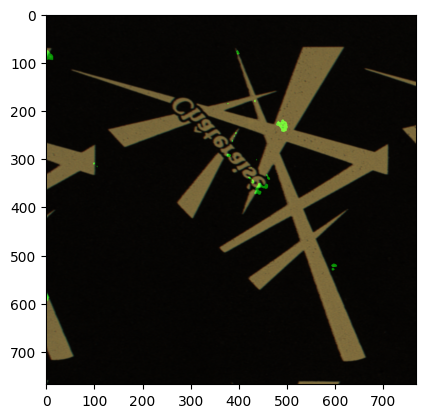

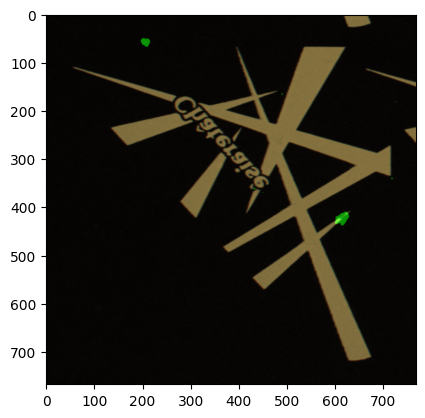

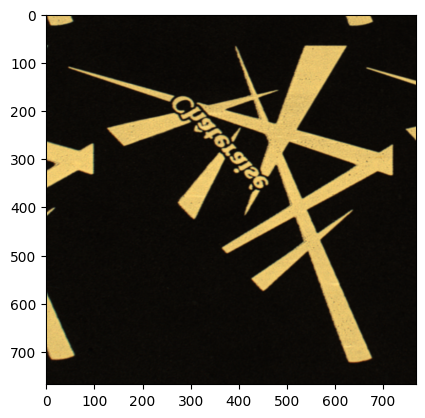

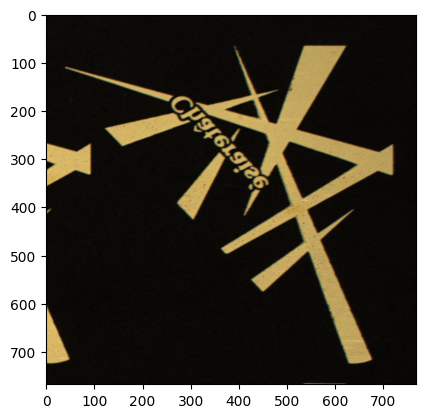

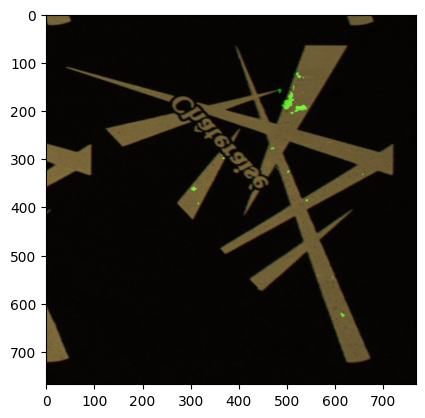

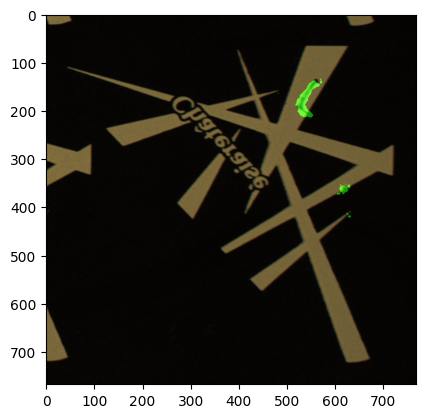

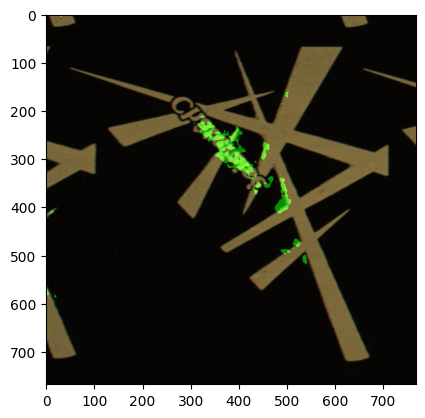

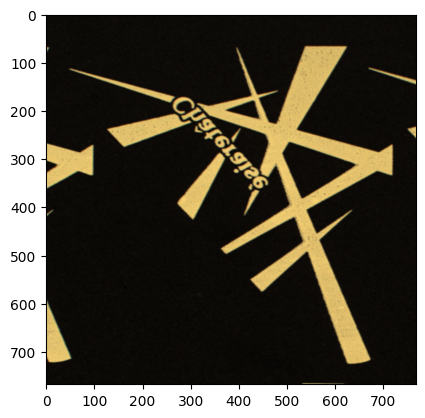

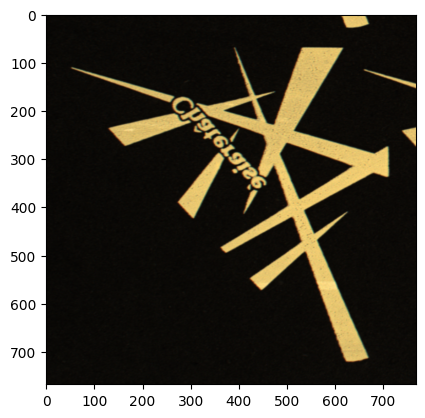

In [21]:
get_anomaly_map("/content/annotated/nok1","/content/drive/MyDrive/connected-robotics-submission/student-teacher-stage-2-with-GAN.ckpt","stage-2-GAN")